In [2]:
#STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np

#LOAD DATASET
df = pd.read_csv("Superstore.csv")   # <- replace with your path
print(df.shape)
df.head()

(9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
#STEP 2: EXPLORE DATASET
# Basic info
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()

# Unique values per column
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,0
Row ID,9800
Order ID,4922
Order Date,1230
Ship Date,1326
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,529


In [11]:
#STEP 3: DATA CLEANING
# Column Names
print(df.columns)

# Handle missing values (example: fill with 0)
df = df.fillna(0)

# Drop duplicates if any
df = df.drop_duplicates()

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Profit'],
      dtype='object')


In [10]:
#STEP 4: SALES INSIGHTS
# Assuming profit is between 10% and 30% of sales
df['Profit'] = df['Sales'] * np.random.uniform(0.1, 0.3, size=len(df))

# Total Sales & Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print("Total Sales:", total_sales, " | Total Profit:", total_profit)

# Sales by Category
sales_category = df.groupby("Category")["Sales"].sum().reset_index()

# Sales by Region
sales_region = df.groupby("Region")["Sales"].sum().reset_index()

Total Sales: 2261536.7827000003  | Total Profit: 453733.4650602309


In [12]:
#STEP 5: TIME-SERIES ANALYSIS
# Add Year-Month column
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Monthly Sales Trend
monthly_sales = df.groupby("YearMonth")["Sales"].sum()

# Yearly Profit Trend
yearly_profit = df.groupby(df['Order Date'].dt.year)["Profit"].sum()

In [13]:
#STEP 6: CUSTOMER ANALYSIS
# Top 10 Customers by Sales
top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)

# Number of orders per customer
customer_orders = df['Customer Name'].value_counts().head(10)

In [14]:
#STEP 7: MERGING HEADS
orders = df[['Order ID','Order Date','Customer ID','Sales']]
customers = df[['Customer ID','Customer Name','Segment']]
merged = pd.merge(orders, customers, on="Customer ID", how="left")
merged.head()

,Order ID,Order Date,Customer ID,Sales,Customer Name,Segment
0,CA-2017-152156,2017-11-08,CG-12520,261.96,Claire Gute,Consumer
1,CA-2017-152156,2017-11-08,CG-12520,261.96,Claire Gute,Consumer
2,CA-2017-152156,2017-11-08,CG-12520,261.96,Claire Gute,Consumer
3,CA-2017-152156,2017-11-08,CG-12520,261.96,Claire Gute,Consumer
4,CA-2017-152156,2017-11-08,CG-12520,261.96,Claire Gute,Consumer


In [15]:
#STEP 8: EXPORT CLEANED DATASET
df.to_csv("Superstore_Cleaned.csv", index=False)

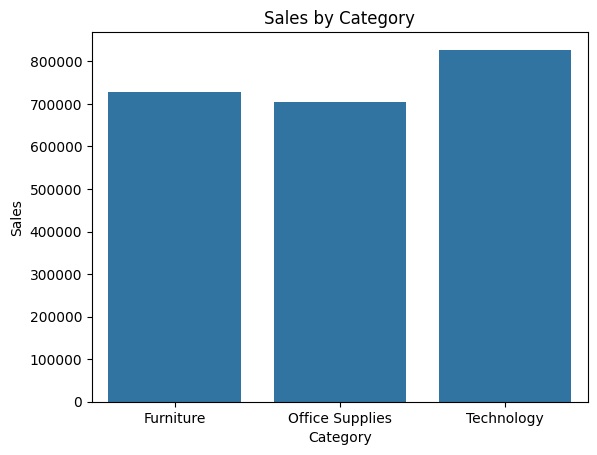

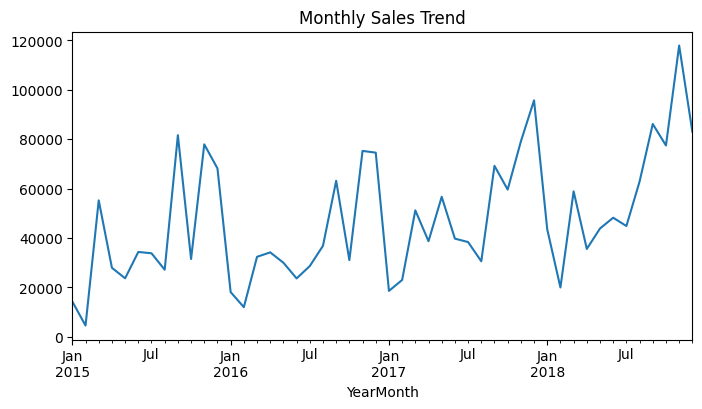

In [17]:
#STEP 9: VISUALIZATION WITH (Seaborn/Matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns

# Sales by Category
sns.barplot(data=sales_category, x="Category", y="Sales")
plt.title("Sales by Category")
plt.show()

# Monthly Sales Trend
monthly_sales.plot(kind="line", figsize=(8,4), title="Monthly Sales Trend")
plt.show()
